In [1]:
from pylab import *
import copy

# Descenso por gradiente

Probemos buscar el mínimo de la función

$$ f(x, y) = \frac{1}{2} (a x^2 + b y^2) $$

In [3]:
def test_fn(r, a, b):
  return 0.5*(a*r[0]**2 + b*r[1]**2)

def grad(r, a, b):
  return [a*r[0], b*r[1]]

aa = 1.0
bb = 0.1
xx = np.linspace(-2*bb, 0.5, num=100)
yy = np.linspace(-bb, 1 + bb, num=200)
X, Y = np.meshgrid(xx, yy, indexing='ij')
rr = np.array([[(x, y) for x in xx] for y in yy])

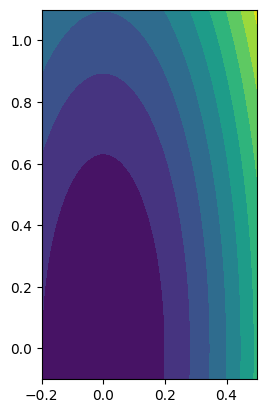

In [4]:
contourf(X, Y, test_fn([X, Y], aa, bb), levels=10)
gca().set_aspect('equal')

Realizamos el proceso iterativo

$$ \mathbf{x}_{k+1} = \mathbf{x}_k - s \nabla f (\mathbf{x}_k) $$

In [5]:
Nsteps = 30
step = 2.0/(1+bb)  # Elegido con el criterio de exact line search
xk = np.zeros(Nsteps+1)
yk = np.zeros(Nsteps+1)
fk = np.zeros(Nsteps+1)

xk[0] = bb
yk[0] = 1.0
fk[0] = test_fn((bb, 1.0), aa, bb)

for ii in range(Nsteps):
  xk[ii+1] = xk[ii] - step*grad((xk[ii], yk[ii]), aa, bb)[0]
  yk[ii+1] = yk[ii] - step*grad((xk[ii], yk[ii]), aa, bb)[1]
  fk[ii+1] = test_fn((xk[ii+1], yk[ii+1]), aa, bb)

x_gd = copy.copy(xk)
y_gd = copy.copy(yk)

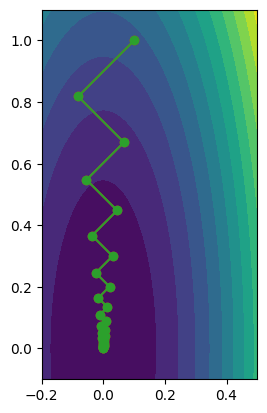

In [6]:
contourf(X, Y, test_fn([X, Y], aa, bb), levels=15)
plot(xk, yk, color='C3', marker='o')
plot(x_gd, y_gd, color='C2', marker='o')
gca().set_aspect('equal')

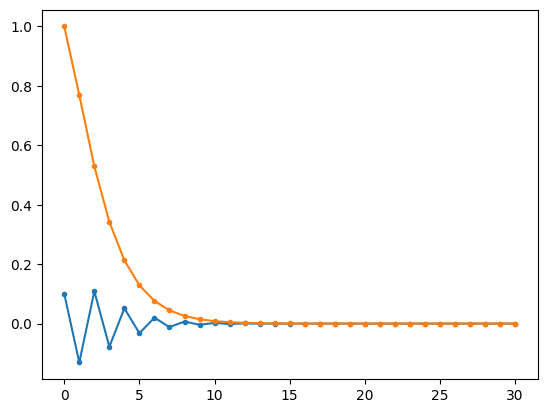

In [15]:
plot(xk, marker='.')
plot(yk, marker='.')

## Variante con momentum

In [19]:
Nsteps = 30
step = (2.0/(1+np.sqrt(bb)))**2
beta = ((1-np.sqrt(bb))/(1+np.sqrt(bb)))**2
xk = np.zeros(Nsteps+1)
wk = np.zeros(Nsteps+1)
yk = np.zeros(Nsteps+1)
zk = np.zeros(Nsteps+1)
fk = np.zeros(Nsteps+1)

xk[0] = bb
yk[0] = 1.0

wk[0] = grad((xk[0], yk[0]), aa, bb)[0]
zk[0] = grad((xk[0], yk[0]), aa, bb)[1]

fk[0] = test_fn((bb, 1.0), aa, bb)

for ii in range(Nsteps):
  xk[ii+1] = xk[ii] - step*wk[ii]
  yk[ii+1] = yk[ii] - step*zk[ii]

  wk[ii+1] = grad((xk[ii+1], yk[ii+1]), aa, bb)[0] + beta*wk[ii]
  zk[ii+1] = grad((xk[ii+1], yk[ii+1]), aa, bb)[1] + beta*zk[ii]

  fk[ii+1] = test_fn((xk[ii+1], yk[ii+1]), aa, bb)

x_mom = copy.copy(xk)
y_mom = copy.copy(yk)

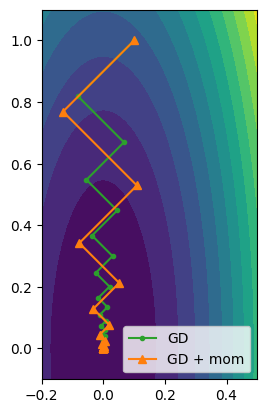

In [20]:
contourf(X, Y, test_fn([X, Y], aa, bb), levels=15)
plot(x_gd, y_gd, color='C2', marker='.', label='GD')
plot(x_mom, y_mom, color='C1', marker='^', label='GD + mom')
legend()
gca().set_aspect('equal')

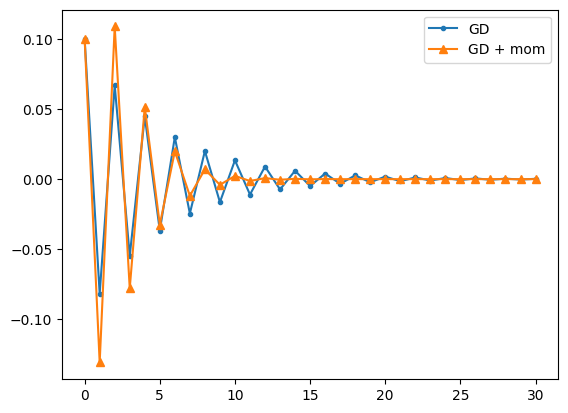

In [ ]:
plot(x_gd, color='C0', marker='.', label='GD')
plot(x_mom, color='C1', marker='^', label='GD + mom')
legend()

## Un mejor ejemplo de SGD

(100, 2)


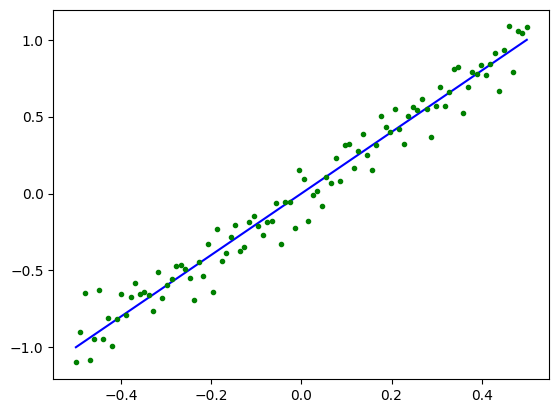

In [ ]:
# Generación de datos
N = 100
data = np.array([(x, 2*x + 1.0) for x in linspace(7,8,num=N)])
data = data - data.mean(axis=0)
plot(data[:, 0], data[:, 1], 'b-')
data = [(x, 2*x+ np.random.normal(0.0, 0.1) + 1.0) for x in linspace(7,8,num=N)]
data = np.array(data)
data = data - data.mean(axis=0)
plot(data[:, 0], data[:, 1], 'g.')
print(shape(data))

In [ ]:
def lineal(x, a, b):
  return a*x + b

def error(yi, x, a, b):
  return (yi - lineal(x,a,b))**2

def grad(yi, x, a, b):
  fact = 2*(yi - lineal(x,a,b))
  da = -x
  db = -1.0
  return np.array([fact*da, fact*db])

In [ ]:
Nsteps = 500
step = 0.1
batch_size = 1
ak = np.zeros(Nsteps+1)
bk = np.zeros(Nsteps+1)
fk = np.zeros(Nsteps+1)

ak[0] = 1.0
bk[0] = 0.0
fk[0] = np.mean(error(data[:, 1], data[:, 0], ak[0], bk[0]))

for ii in range(Nsteps):
  idx   = np.random.choice(N, size=batch_size)
  points = data[idx]
  geval = 0
  for pp in points:
    geval += (1/batch_size)*grad(pp[1], pp[0], ak[ii], bk[ii])
  ak[ii+1] = ak[ii] - step*geval[0]
  bk[ii+1] = bk[ii] - step*geval[1]
  fk[ii+1] = np.mean(error(data[:, 1], data[:, 0], ak[ii+1], bk[ii+1]))


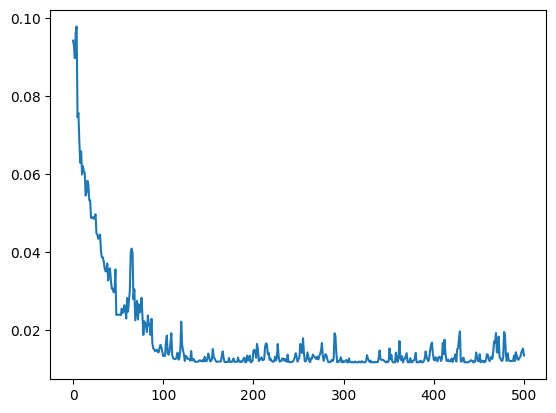

In [ ]:
plot(fk)

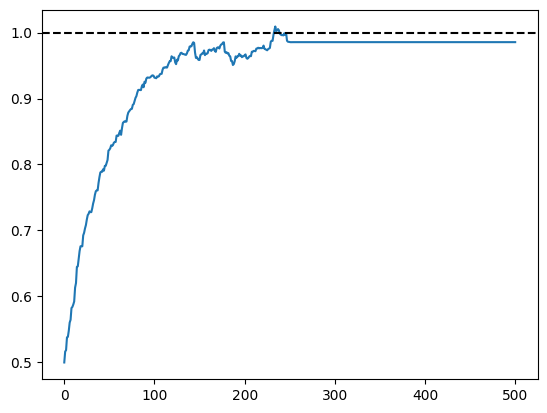

In [ ]:
plot(ak/2.0)
axhline(1.0, color='k', ls='--')

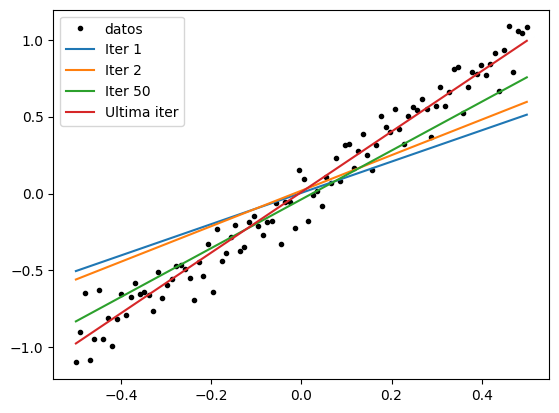

In [ ]:
plot(data[:, 0], data[:, 1], 'k.', label='datos')
plot(data[:, 0], lineal(data[:, 0], ak[1], bk[1]), label='Iter 1')
plot(data[:, 0], lineal(data[:, 0], ak[10], bk[10]), label='Iter 2')
plot(data[:, 0], lineal(data[:, 0], ak[50], bk[50]), label='Iter 50')
plot(data[:, 0], lineal(data[:, 0], ak[-1], bk[-1]), label='Ultima iter')
legend()

In [ ]:
asp = linspace(0, 3)
bsp = linspace(-1, 1)
errs = np.array([[np.mean(error(data[:, 1], data[:, 0], aa, bb)) for aa in asp] for bb in bsp])

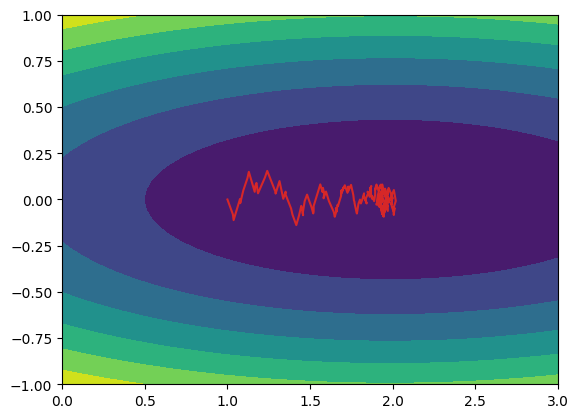

In [ ]:
contourf(asp, bsp, errs)
plot(ak, bk, color='C3')

Matrices aleatorias

In [ ]:
A = np.random.rand(4,4)
A

array([[0.64618457, 0.81257766, 0.14937665, 0.82721063],
       [0.55711238, 0.9372673 , 0.11535939, 0.7685464 ],
       [0.67590219, 0.19344646, 0.28288882, 0.90358253],
       [0.79291449, 0.55206894, 0.22879335, 0.45845572]])